#### 단일 표본 t 검정

In [1]:
# data 불러오기
import os
os.chdir(r"C:\Users\user\jupyter\python\preprocessing\Part2. 탐색적 데이터 분석\데이터")

with open("성인여성_키_데이터.txt", "r") as f:
    data = f.read().split('\n')
    data = list(map(float, data))  # str 데이터를 모두 float 화 시킴. read()는 str으로 불러옴. 

In [2]:
len(data)


25

156.9332 9.974187774450611


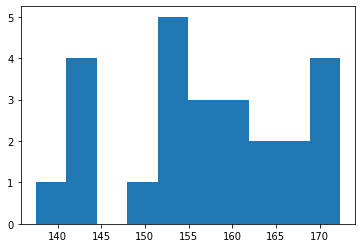

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import *
import numpy as np


plt.hist(data)
# 이따구로 생겼는데 정규분포를 따른다고? 그지같은 분포인데도?

print(np.mean(data) , np.std(data))

In [30]:
data[:3]

[150.27, 142.94, 160.99]

In [20]:
# 정규성 검정
from scipy.stats import *
kstest(data, 'norm') # p-value가 0.0 < 0.05으로 정규성을 띈다고 볼 수 있음 


KstestResult(statistic=1.0, pvalue=0.0)

In [42]:
# 단일 표본 t 검정 수행: 정규성을 가정해야지만 사용 가능한 것이다. 
print(ttest_1samp(data, 163)) 

# pvalue가 0.05 미만이므 로 영가설 (data의 평균 == 163) 기각
# 통계량이 음수이므로 data이 평균 < 163임을 알 수 있음

Ttest_1sampResult(statistic=-2.979804412662668, pvalue=0.006510445335847954)


#### 독립 표본 t 검정

In [22]:
import pandas as pd

df1 = pd.read_csv("반별_점수_type1.csv", engine = "python")
df1.head()

,반,점수
0,A,73
1,A,69
2,A,71
3,A,71
4,A,73


In [23]:
group_A = df1['점수'].loc[df1['반'] == 'A'].values
group_B = df1['점수'].loc[df1['반'] == 'B'].values

print(group_A)
print(group_B)

[73 69 71 71 73 67 73 69 62 74 68 66 70 82 70 65 76 73 58 81]
[63 56 73 61 55 77 75 65 61 55]


KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
70.55 32.26052631578948
64.1 68.54444444444445
______________________________________________________________________


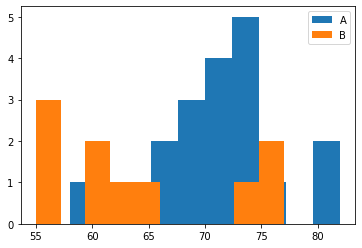

In [32]:
# kstest를 이용한 정규성 검정: 모두 정규 분포를 띔을 확인
print(kstest(group_A, 'norm'))
print(kstest(group_B, 'norm'))

plt.hist(group_A, label = 'A')
plt.hist(group_B, label = 'B')
plt.legend()

print(np.mean(group_A), np.var(group_A, None, ddof = 1))
print(np.mean(group_B), np.var(group_B, None, ddof = 1))

# 아니 이따구로 생겼는데도 정규분포라고 한다고????
print('_'*70)

# 이제 검증해야 할 것은 이 두 집단의 차이가 유의한지이다. 

In [49]:
# 등분산 검정: levene를 사용할 때, p값이 특정 수 미만이 되면 등분산이 아니라고 말할 수 있다.
levene(group_A, group_B) # pvalue가 0.05 미만이 아니므로, 등분산을 띈다고 볼 수 있음

LeveneResult(statistic=2.033067087400979, pvalue=0.164964086222101)

In [55]:
np.var(group_A, None, ddof=1)

32.26052631578948

In [64]:
# A와 B간에는 차이가 존재함을 확인 
print(ttest_ind(group_A, group_B, equal_var = True)) 
# A그룹의 성적이 더 좋다. 

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)


#### Tip. 다른 포맷의 데이터 처리

In [35]:
df2 = pd.read_csv("반별_점수_type2.csv", engine = "python")
df2['B반'] # 같은 데이터 타입을 예상했지만, 하나는 정수, 하나는 부동소수점으로 나온다면?
# 결측이 존재하는지 확인해줍시다. 

0     63.0
1     56.0
2     73.0
3     61.0
4     55.0
5     77.0
6     75.0
7     65.0
8     61.0
9     55.0
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: B반, dtype: float64

In [36]:
# 길이가 달라서 결측이 발생할 수 있으므로, 결측을 제거한 뒤 각 컬럼을 group_A와 group_B에 저장
group_A = df2['A반'].dropna().values
group_B = df2['B반'].dropna().values 

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


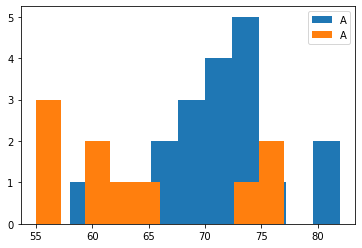

In [43]:
print(kstest(group_A, 'norm'))
print(kstest(group_B, 'norm'))
# 둘다 정규성을 띈다고 말할 수 있다.
len(group_A)
len(group_B)

plt.hist(group_A, label = "A")
plt.hist(group_B, label = "A")
plt.legend()

In [46]:
levene(group_A, group_B) # 0.05보다는 크기 때문에 등분산이라고 말할 수 있다.
print(ttest_ind(group_A, group_B, equal_var = True)) 
# 양수이기 때문에 A 그룹이 더 크다고 말할 수 있다.

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)
